In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78549738/least-square-inaccurate-in-chemical-speciation

In [2]:
pK = np.array([2.81, 2.27, 1.77, 1.27, 0.81, 0.15])

In [3]:
pKs = np.cumsum(pK)

In [4]:
#pK = np.array([2.80, 5.04, 6.77, 7.96, 8.71, 8.74])

In [5]:
def monom(i, pK, L):
    K = np.power(10., pK)
    return np.power(L, i) * np.prod(K[:i])

In [6]:
def polynom(pK, L):
    return np.sum([monom(i, pK, L) for i in range(len(pK) + 1)], axis=0)

In [7]:
def alpha(i, pK, L):
    return monom(i, pK, L) / polynom(pK, L)

In [8]:
def alphas(pK, L):
    return np.array([
        alpha(i, pK, L)
        for i in range(len(pK) + 1)
    ]).T

In [9]:
L = np.logspace(-5, 2, 200)
As = alphas(pK, L)

In [10]:
np.allclose(np.sum(As, axis=1), 1.)

True

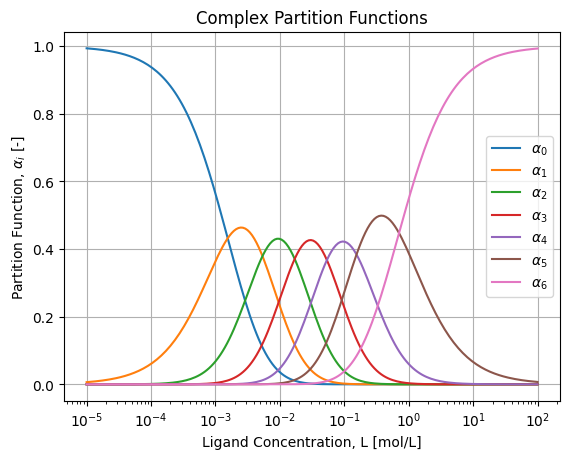

In [11]:
fig, axe = plt.subplots()
axe.semilogx(L, As)
axe.set_title("Complex Partition Functions")
axe.set_xlabel("Ligand Concentration, L [mol/L]")
axe.set_ylabel(r"Partition Function, $\alpha_i$ [-]")
axe.legend([r"$\alpha_{%d}$" % i for i in range(len(pK) + 1)])
axe.grid()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pandas as pd

Ni_tot = 1
K1 = 2.81
K2 = 2.27
K3 = 1.77
K4 = 1.27
K5 = 0.81
K6 = 0.15

# Define the system of nonlinear equations
def equations(x, Ni_tot, NH3_tot):
    Ni0, Ni1, Ni2, Ni3, Ni4, Ni5, Ni6, NH3 = x
    eq1 = np.log10(Ni1)-np.log10(Ni0)-np.log10(NH3)-K1
    eq2 = np.log10(Ni2)-np.log10(Ni1)-np.log10(NH3)-K2
    eq3 = np.log10(Ni3)-np.log10(Ni2)-np.log10(NH3)-K3
    eq4 = np.log10(Ni4)-np.log10(Ni3)-np.log10(NH3)-K4
    eq5 = np.log10(Ni5)-np.log10(Ni4)-np.log10(NH3)-K5
    eq6 = np.log10(Ni6)-np.log10(Ni5)-np.log10(NH3)-K6
    eq7 = Ni0 + Ni1 + Ni2 + Ni3 + Ni4 + Ni5 + Ni6 - Ni_tot
    eq8 = Ni1 + 2*Ni2 + 3*Ni3 + 4*Ni4 + 5*Ni5 + 6*Ni6 - NH3_tot
    
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8])

# Arrays for data storage
NH3_tot = np.arange(0, 14, 0.1)

sol1 = []
sol2 = []

# Speciation determination with least_square at various NH3_tot
x0 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
for NH3 in NH3_tot:
    
    result = least_squares(
        equations, x0,
        method="trf",
        args=(Ni_tot, NH3),
        bounds=([0,0,0,0,0,0,0,0],[Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot]),
    )
    sol1.append(result.x)
    
    solution = optimize.fsolve(equations, x0=x0, args=(Ni_tot, NH3))
    sol2.append(solution)
    


/tmp/ipykernel_2486/2145976342.py:17: RuntimeWarning: invalid value encountered in log10
  eq1 = np.log10(Ni1)-np.log10(Ni0)-np.log10(NH3)-K1
/tmp/ipykernel_2486/2145976342.py:18: RuntimeWarning: invalid value encountered in log10
  eq2 = np.log10(Ni2)-np.log10(Ni1)-np.log10(NH3)-K2
/tmp/ipykernel_2486/2145976342.py:19: RuntimeWarning: invalid value encountered in log10
  eq3 = np.log10(Ni3)-np.log10(Ni2)-np.log10(NH3)-K3
/tmp/ipykernel_2486/2145976342.py:20: RuntimeWarning: invalid value encountered in log10
  eq4 = np.log10(Ni4)-np.log10(Ni3)-np.log10(NH3)-K4
/tmp/ipykernel_2486/2145976342.py:21: RuntimeWarning: invalid value encountered in log10
  eq5 = np.log10(Ni5)-np.log10(Ni4)-np.log10(NH3)-K5
/tmp/ipykernel_2486/2145976342.py:22: RuntimeWarning: invalid value encountered in log10
  eq6 = np.log10(Ni6)-np.log10(Ni5)-np.log10(NH3)-K6
/tmp/ipykernel_2486/2145976342.py:46: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten

In [16]:
sol2

[array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
